In [2]:
import pandas as pd
import numpy as np
from contextlib import chdir
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binomtest
import math
import sys
import gseapy as gp

Import the mutation data

In [3]:
with chdir(".."):
    mutations_df = pd.read_csv("input_data/mutations.csv", sep="\t")

In [4]:
mutations_df.head()

,file_path,project_id,project_name,disease_type,primary_site,Hugo_Symbol,Entrez_Gene_Id,Chromosome,Start_Position,End_Position,Strand,Variant_Classification,Variant_Type,CCDS
0,Ductal_and_Lobular_Neoplasms/f41a0b2f-161f-487...,TCGA-BRCA,Breast Invasive Carcinoma,Ductal and Lobular Neoplasms,Breast,KLHL17,339451,chr1,963353,963353,+,Missense_Mutation,SNP,CCDS30550.1
1,Ductal_and_Lobular_Neoplasms/f41a0b2f-161f-487...,TCGA-BRCA,Breast Invasive Carcinoma,Ductal and Lobular Neoplasms,Breast,UBIAD1,29914,chr1,11273542,11273542,+,Missense_Mutation,SNP,CCDS129.1
2,Ductal_and_Lobular_Neoplasms/f41a0b2f-161f-487...,TCGA-BRCA,Breast Invasive Carcinoma,Ductal and Lobular Neoplasms,Breast,PRAMEF1,65121,chr1,12793336,12793336,+,Missense_Mutation,SNP,CCDS148.1
3,Ductal_and_Lobular_Neoplasms/f41a0b2f-161f-487...,TCGA-BRCA,Breast Invasive Carcinoma,Ductal and Lobular Neoplasms,Breast,PLEKHM2,23207,chr1,15727771,15727771,+,Missense_Mutation,SNP,CCDS44063.1
4,Ductal_and_Lobular_Neoplasms/f41a0b2f-161f-487...,TCGA-BRCA,Breast Invasive Carcinoma,Ductal and Lobular Neoplasms,Breast,TMCO4,255104,chr1,19746460,19746460,+,Silent,SNP,CCDS198.1


In [5]:
disease_type_count = mutations_df[['disease_type', 'primary_site']].value_counts().reset_index()
disease_type_count.head()

,disease_type,primary_site,count
0,Adenomas and Adenocarcinomas,Corpus uteri,485913
1,Adenomas and Adenocarcinomas,Bronchus and lung,244919
2,Adenomas and Adenocarcinomas,Colon,231135
3,Adenomas and Adenocarcinomas,Stomach,199128
4,Squamous Cell Neoplasms,Bronchus and lung,179414


In [6]:
disease_x_site = disease_type_count.pivot(index='disease_type', columns='primary_site', values='count')

disease_x_site['total_sum'] = disease_x_site.sum(axis=1)
disease_x_site = disease_x_site.sort_values(by='total_sum', ascending=False).drop('total_sum', axis=1)

column_sums = disease_x_site.sum()
sorted_column_names = column_sums.sort_values(ascending=False).index.tolist()
disease_x_site = disease_x_site[sorted_column_names]

disease_x_site_modified = disease_x_site.iloc[:, :10]
disease_x_site_modified['Other'] = disease_x_site.iloc[:, 10:-1].sum(axis=1)

disease_x_site_modified.head()

/var/folders/6h/q2bgrd9147945_8pqxd8__t40000gp/T/ipykernel_23112/1015668179.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disease_x_site_modified['Other'] = disease_x_site.iloc[:, 10:-1].sum(axis=1)


primary_site,Corpus uteri,Bronchus and lung,Colon,Stomach,Lymph nodes,"Uterus, NOS",Skin,Brain,Hematopoietic and reticuloendothelial systems,Breast,Other
disease_type,,,,,,,,,,,
Adenomas and Adenocarcinomas,485913.0,244919.0,231135.0,199128.0,34.0,161378.0,NaN,NaN,NaN,65.0,237103.0
Nevi and Melanomas,378.0,11206.0,617.0,NaN,166798.0,NaN,140026.0,3352.0,NaN,294.0,63845.0
Squamous Cell Neoplasms,NaN,179414.0,NaN,205.0,NaN,NaN,5070.0,NaN,NaN,71.0,152994.0
"Cystic, Mucinous and Serous Neoplasms",71282.0,2200.0,64167.0,16660.0,NaN,113.0,NaN,NaN,NaN,499.0,54046.0
Ductal and Lobular Neoplasms,NaN,823.0,8251.0,NaN,NaN,NaN,NaN,NaN,NaN,113847.0,38860.0


<Axes: xlabel='disease_type'>

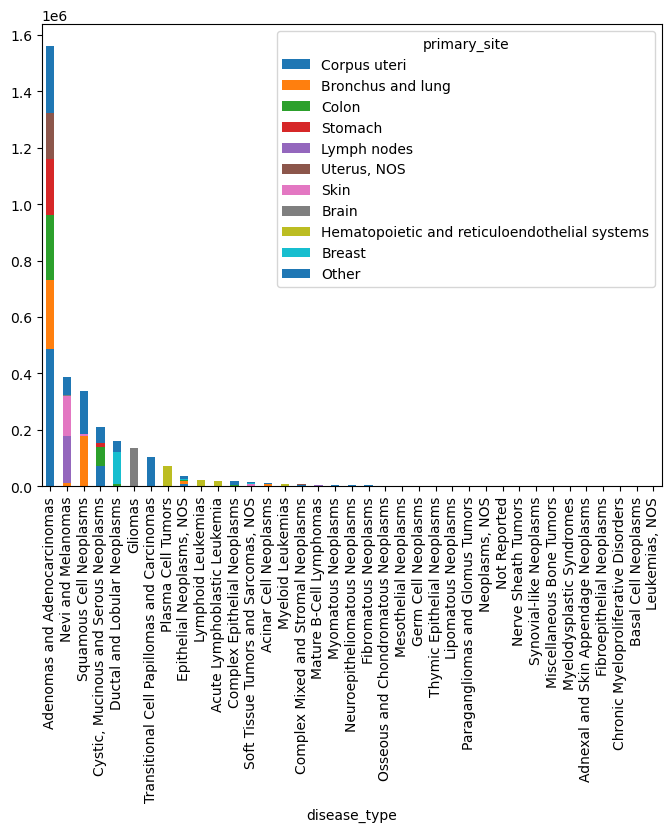

In [7]:
disease_x_site_modified.plot.bar(stacked=True, figsize=(8, 6))

In [8]:
primary_site_count = mutations_df['primary_site'].value_counts()

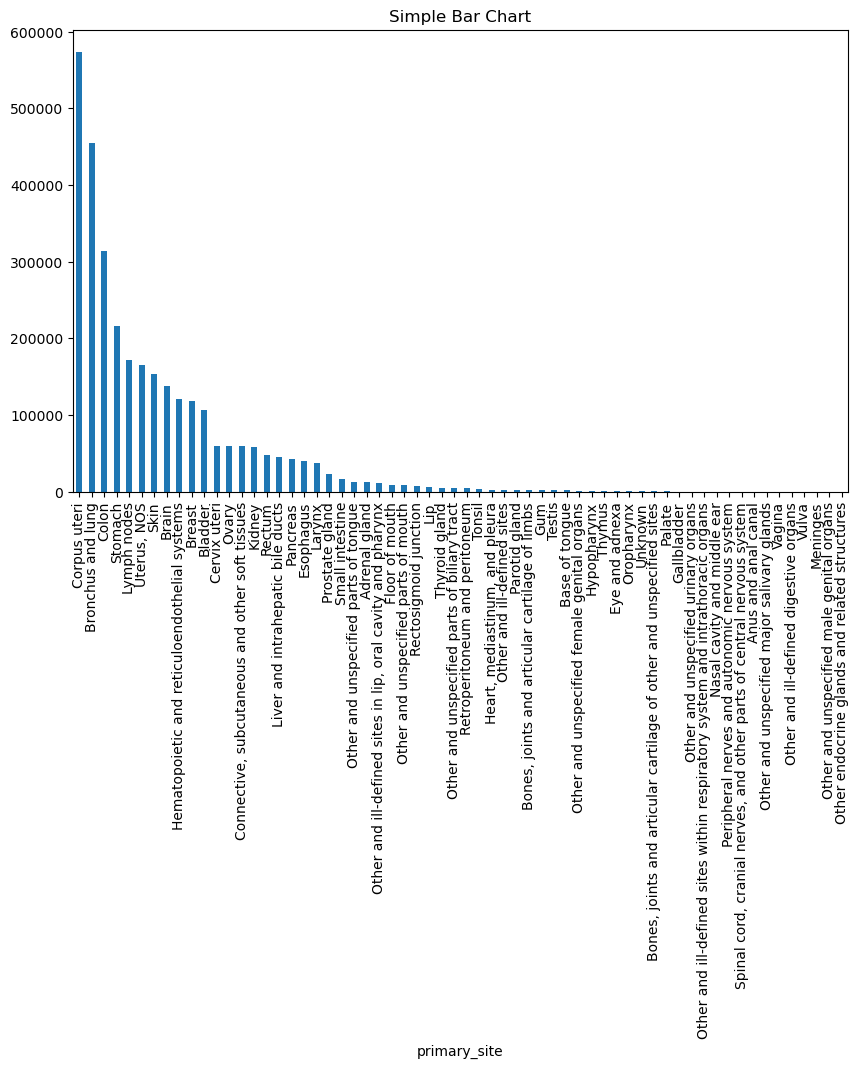

In [9]:
plt.figure(figsize=(10, 6))
primary_site_count.plot(x='primary_site', y='count', kind='bar', title='Simple Bar Chart')
plt.show()

In [10]:
project_name_count = mutations_df['project_name'].value_counts()

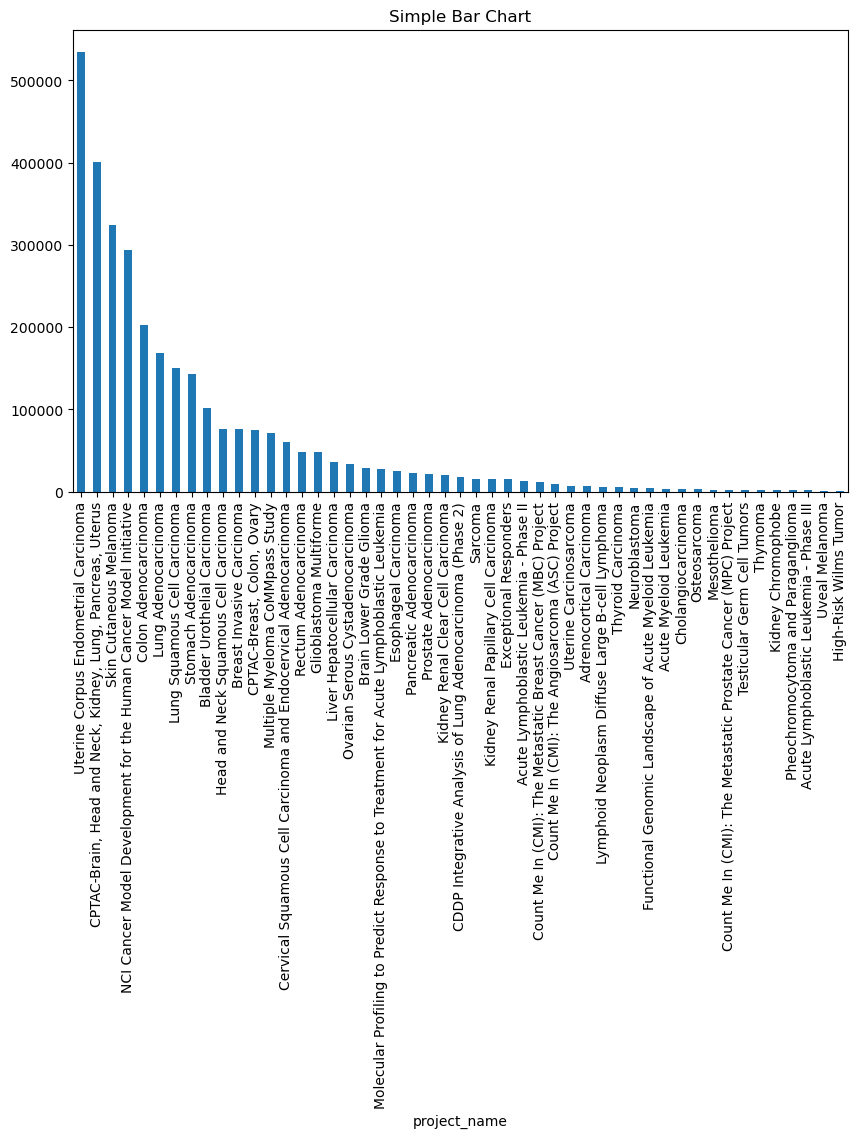

In [11]:
plt.figure(figsize=(10, 6))
project_name_count.plot(x='project_name', y='count', kind='bar', title='Simple Bar Chart')
plt.show()

## Mutation Counts

In [12]:
with chdir(".."):
    counts_df = pd.read_csv("results/counts.csv")

In [13]:
counts_df.head()

,Unnamed: 0,chrom,start,end,gene,type,silent_count,missense_count
0,0,chr1,65564.0,65572.0,OR4F5,normal,0,0
1,1,chr1,69036.0,69431.0,OR4F5,normal,3,4
2,2,chr1,69432.0,69458.0,OR4F5,SAE,0,1
3,3,chr1,69459.0,69626.0,OR4F5,normal,3,9
4,4,chr1,69627.0,69662.0,OR4F5,SAE,0,1


In [14]:
counts_df['interval_len'] = counts_df['end'] - counts_df['start']

In [15]:
sum_by_gene = counts_df.groupby(['gene', 'type'])[['interval_len', 'silent_count', 'missense_count']].sum()

In [16]:
sum_by_gene2 = counts_df.groupby(['gene'])[['interval_len', 'silent_count', 'missense_count']].sum()

In [17]:
sum_by_gene['silent_freq'] = sum_by_gene['silent_count'] / sum_by_gene['interval_len']
sum_by_gene['missense_freq'] = sum_by_gene['missense_count'] / sum_by_gene['interval_len']
sum_by_gene['total_count'] = sum_by_gene['silent_count'] + sum_by_gene['missense_count']
sum_by_gene['total_freq'] = sum_by_gene['total_count'] / sum_by_gene['interval_len']

In [18]:
sum_by_gene2['total_count'] = sum_by_gene2['silent_count'] + sum_by_gene2['missense_count']
sum_by_gene2 = sum_by_gene2.sort_values(by="total_count", ascending=False).reset_index()

In [19]:
sum_by_gene.head()
with chdir('..'):
    sum_by_gene.to_csv('results/sum_by_gene.csv')

In [20]:
sum_by_gene['interval_len'].sum()

np.float64(151183296.0)

In [21]:
sum_by_gene2.head()

,gene,interval_len,silent_count,missense_count,total_count
0,TTN,113994.0,3477,10546,14023
1,MUC16,43309.0,2016,5404,7420
2,TP53,8910.0,49,3936,3985
3,RYR2,14727.0,800,2553,3353
4,CSMD3,11066.0,639,2577,3216


In [22]:
sum_by_gene2[sum_by_gene2['total_count'] >= 0]

,gene,interval_len,silent_count,missense_count,total_count
0,TTN,113994.0,3477,10546,14023
1,MUC16,43309.0,2016,5404,7420
2,TP53,8910.0,49,3936,3985
3,RYR2,14727.0,800,2553,3353
4,CSMD3,11066.0,639,2577,3216
...,...,...,...,...,...
19093,MCTS2,545.0,0,0,0
19094,C21orf140,755.0,0,0,0
19095,TBC1D3,1637.0,0,0,0
19096,THSD8,346.0,0,0,0


(0.0, 10000.0)

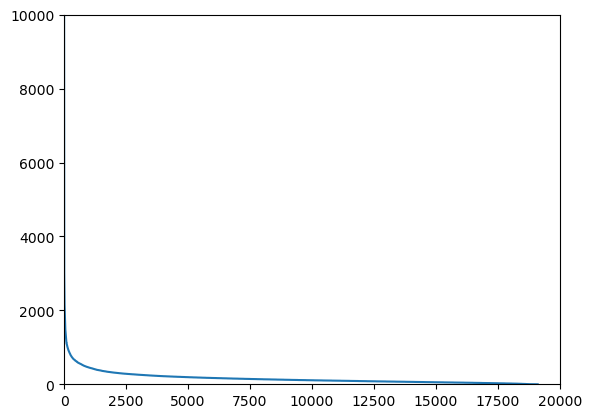

In [23]:
plt.plot(sum_by_gene2.index, sum_by_gene2['total_count'])
plt.xlim(0,20000)
plt.ylim(0,10000)

In [24]:
sums_sorted_by_silent_freq = sum_by_gene.sort_values(by='silent_freq', ascending=False)
sums_sorted_by_missense_freq = sum_by_gene.sort_values(by='missense_freq', ascending=False)

In [25]:
sums_sorted_by_missense_freq.head()

,,interval_len,silent_count,missense_count,silent_freq,missense_freq,total_count,total_freq
gene,type,,,,,,,
KRAS,SCE,105.0,5,1685,0.047619,16.047619,1690,16.095238
TP53,SAE,90.0,4,645,0.044444,7.166667,649,7.211111
NRAS,SCE,73.0,3,409,0.041096,5.602740,412,5.643836
KRAS,SAE,100.0,1,116,0.010000,1.160000,117,1.170000
FBXW7,SAE,169.0,2,165,0.011834,0.976331,167,0.988166


In [26]:
sums_sorted_by_silent_freq.head()

,,interval_len,silent_count,missense_count,silent_freq,missense_freq,total_count,total_freq
gene,type,,,,,,,
KLRD1,SCE,6.0,4,0,0.666667,0.000000,4,0.666667
PIRT,SAE,44.0,24,3,0.545455,0.068182,27,0.613636
POM121L12,SAE,56.0,23,35,0.410714,0.625000,58,1.035714
TGIF2LX,SAE,26.0,10,8,0.384615,0.307692,18,0.692308
PRSS58,SAE,26.0,10,4,0.384615,0.153846,14,0.538462


In [27]:
sum_by_gene = sum_by_gene.reset_index()
sum_by_gene.head()

,gene,type,interval_len,silent_count,missense_count,silent_freq,missense_freq,total_count,total_freq
0,A1BG,SCE,175.0,3,7,0.017143,0.040000,10,0.057143
1,A1BG,normal,1481.0,51,82,0.034436,0.055368,133,0.089804
2,A1CF,SAE,161.0,8,25,0.049689,0.155280,33,0.204969
3,A1CF,SCE,215.0,12,34,0.055814,0.158140,46,0.213953
4,A1CF,normal,1503.0,64,156,0.042582,0.103792,220,0.146374


In [28]:
counts = sum_by_gene.groupby('gene')['gene'].transform('count')
sum_by_gene_filtered = sum_by_gene[counts == 3].reset_index(drop=True)
sum_by_gene_filtered.head()

,gene,type,interval_len,silent_count,missense_count,silent_freq,missense_freq,total_count,total_freq
0,A1CF,SAE,161.0,8,25,0.049689,0.155280,33,0.204969
1,A1CF,SCE,215.0,12,34,0.055814,0.158140,46,0.213953
2,A1CF,normal,1503.0,64,156,0.042582,0.103792,220,0.146374
3,A2M,SAE,26.0,0,2,0.000000,0.076923,2,0.076923
4,A2M,SCE,54.0,1,3,0.018519,0.055556,4,0.074074


In [29]:
sum_by_gene_filtered.shape

(37803, 9)

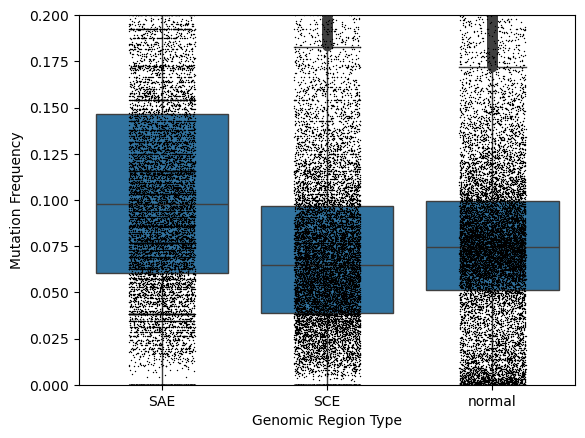

In [30]:
fig, ax = plt.subplots()

sns.boxplot(x ="type", 
            y ="total_freq", 
            data =sum_by_gene_filtered,
            )

sns.stripplot(x="type",
              y="total_freq",
              data=sum_by_gene_filtered, 
              color="black", 
              size=1,
              jitter=0.2,
              ax=ax
              )

ax.set_xlabel('Genomic Region Type')
ax.set_ylabel('Mutation Frequency')
ax.set_ylim(0, 0.2)

with chdir('..'):
    plt.savefig('figures/mutation_freq_by_type.png', bbox_inches='tight')

plt.show()

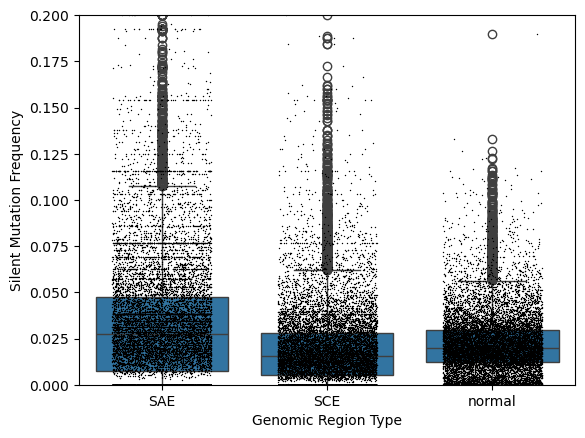

In [31]:
fig, ax = plt.subplots()

sns.boxplot(x ="type", 
            y ="silent_freq", 
            data = sum_by_gene_filtered,
            ax=ax
            )

sns.stripplot(x="type",
              y="silent_freq",
              data=sum_by_gene_filtered, 
              color="black", 
              size=1,
              jitter=0.3,
              ax=ax
              )

ax.set_xlabel('Genomic Region Type')
ax.set_ylabel('Silent Mutation Frequency')
ax.set_ylim(0, 0.2)

plt.show()

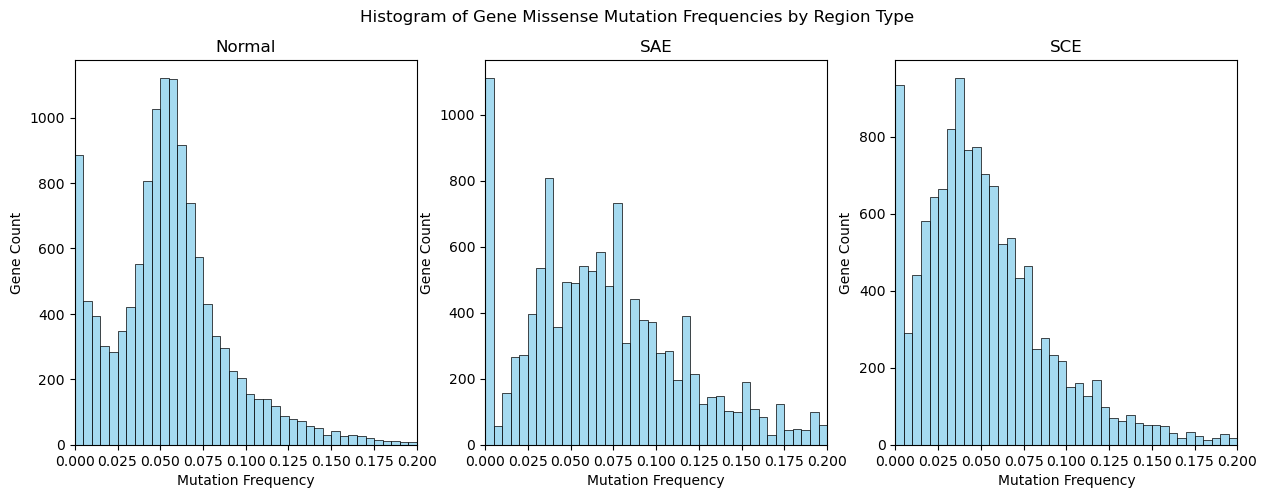

In [32]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

normal_max = max(sum_by_gene_filtered.loc[sum_by_gene_filtered['type'] == 'normal']['missense_freq'])

SAE_max = max(sum_by_gene_filtered.loc[sum_by_gene_filtered['type'] == 'SAE']['missense_freq'])

SCE_max = max(sum_by_gene_filtered.loc[sum_by_gene_filtered['type'] == 'SCE']['missense_freq'])

sns.histplot(sum_by_gene_filtered.loc[sum_by_gene_filtered['type'] == 'normal'], 
             x='missense_freq',
             color='skyblue',
             bins=int(normal_max * 200),
             ax=axes[0],
             edgecolor="black",
             linewidth=0.5
            )

sns.histplot(sum_by_gene_filtered.loc[sum_by_gene_filtered['type'] == 'SAE'], 
             x='missense_freq',
             color='skyblue',
             bins=int(SAE_max * 200),
             ax=axes[1],
             edgecolor="black",
             linewidth=0.5
            )

sns.histplot(sum_by_gene_filtered.loc[sum_by_gene_filtered['type'] == 'SCE'], 
             x='missense_freq',
             color='skyblue',
             bins=int(SCE_max * 200),
             ax=axes[2],
             edgecolor="black",
             linewidth=0.5
            )

for n in range(3):
    axes[n].set_xlim(0, 0.2)
    axes[n].set_xlabel('Mutation Frequency')
    axes[n].set_ylabel('Gene Count')

axes[0].set_title("Normal")
axes[1].set_title("SAE")
axes[2].set_title("SCE")

plt.suptitle("Histogram of Gene Missense Mutation Frequencies by Region Type")

with chdir('..'):
    plt.savefig('figures/missense_mutation_histograms.png', bbox_inches='tight')

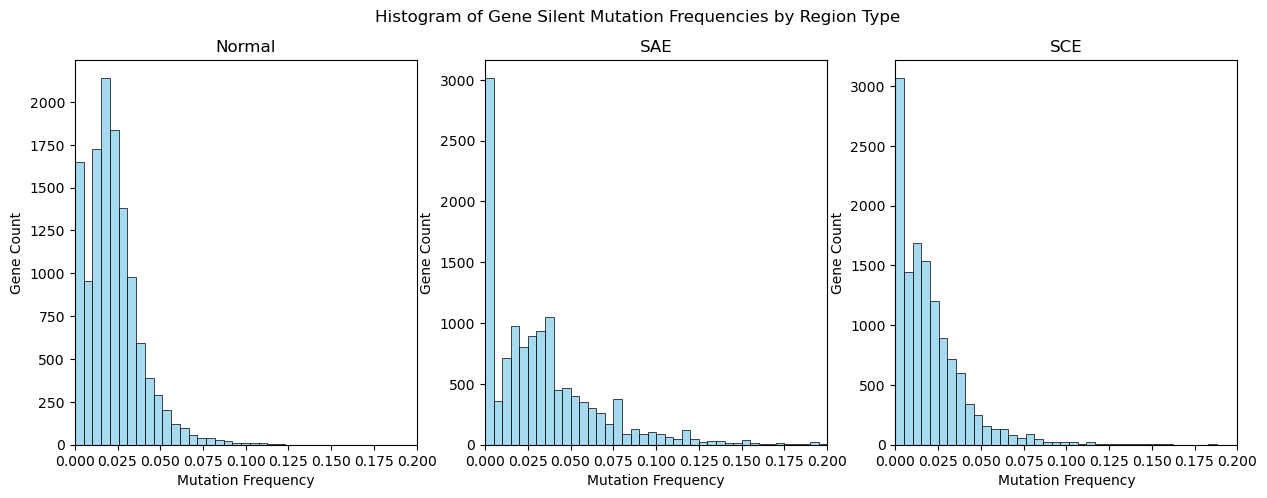

In [33]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

normal_max = max(sum_by_gene_filtered.loc[sum_by_gene_filtered['type'] == 'normal']['silent_freq'])

SAE_max = max(sum_by_gene_filtered.loc[sum_by_gene_filtered['type'] == 'SAE']['silent_freq'])

SCE_max = max(sum_by_gene_filtered.loc[sum_by_gene_filtered['type'] == 'SCE']['silent_freq'])

sns.histplot(sum_by_gene_filtered.loc[sum_by_gene_filtered['type'] == 'normal'], 
             x='silent_freq',
             color='skyblue',
             bins=int(normal_max * 200),
             ax=axes[0],
             edgecolor="black",
             linewidth=0.5
            )

sns.histplot(sum_by_gene_filtered.loc[sum_by_gene_filtered['type'] == 'SAE'], 
             x='silent_freq',
             color='skyblue',
             bins=int(SAE_max * 200),
             ax=axes[1],
             edgecolor="black",
             linewidth=0.5
            )

sns.histplot(sum_by_gene_filtered.loc[sum_by_gene_filtered['type'] == 'SCE'], 
             x='silent_freq',
             color='skyblue',
             bins=int(SCE_max * 200),
             ax=axes[2],
             edgecolor="black",
             linewidth=0.5
            )

for n in range(3):
    axes[n].set_xlim(0, 0.2)
    axes[n].set_xlabel('Mutation Frequency')
    axes[n].set_ylabel('Gene Count')

axes[0].set_title("Normal")
axes[1].set_title("SAE")
axes[2].set_title("SCE")

plt.suptitle("Histogram of Gene Silent Mutation Frequencies by Region Type")

with chdir('..'):
    plt.savefig('figures/silent_mutation_histograms.png', bbox_inches='tight')

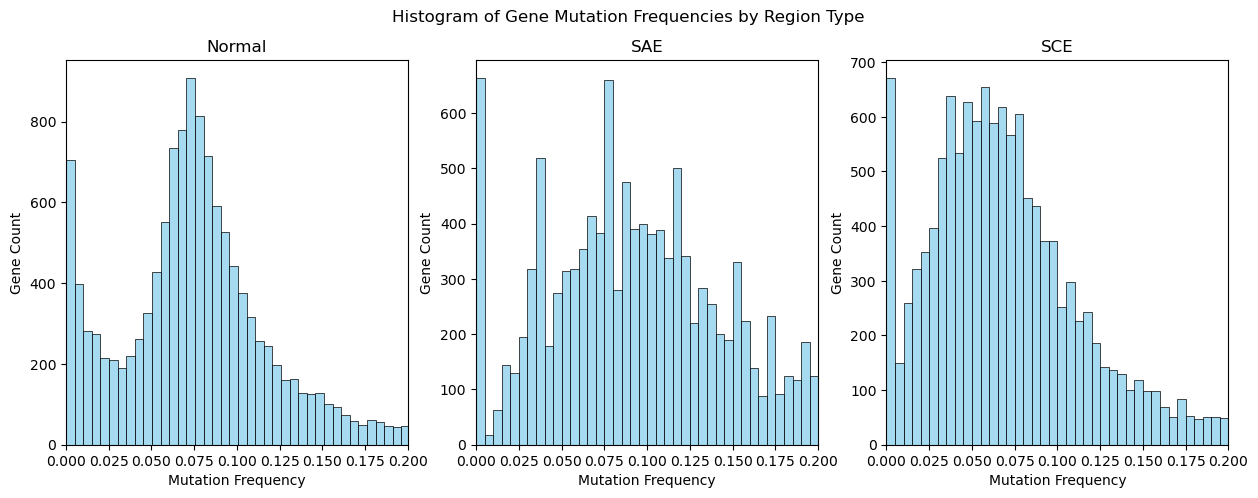

In [34]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

normal_max = max(sum_by_gene_filtered.loc[sum_by_gene_filtered['type'] == 'normal']['total_freq'])

SAE_max = max(sum_by_gene_filtered.loc[sum_by_gene_filtered['type'] == 'SAE']['total_freq'])

SCE_max = max(sum_by_gene_filtered.loc[sum_by_gene_filtered['type'] == 'SCE']['total_freq'])

sns.histplot(sum_by_gene_filtered.loc[sum_by_gene_filtered['type'] == 'normal'], 
             x='total_freq',
             color='skyblue',
             bins=int(normal_max * 200),
             ax=axes[0],
             edgecolor="black",
             linewidth=0.5
            )

sns.histplot(sum_by_gene_filtered.loc[sum_by_gene_filtered['type'] == 'SAE'], 
             x='total_freq',
             color='skyblue',
             bins=int(SAE_max * 200),
             ax=axes[1],
             edgecolor="black",
             linewidth=0.5
            )

sns.histplot(sum_by_gene_filtered.loc[sum_by_gene_filtered['type'] == 'SCE'], 
             x='total_freq',
             color='skyblue',
             bins=int(SCE_max * 200),
             ax=axes[2],
             edgecolor="black",
             linewidth=0.5
            )

for n in range(3):
    axes[n].set_xlim(0, 0.2)
    axes[n].set_xlabel('Mutation Frequency')
    axes[n].set_ylabel('Gene Count')

axes[0].set_title("Normal")
axes[1].set_title("SAE")
axes[2].set_title("SCE")

plt.suptitle("Histogram of Gene Mutation Frequencies by Region Type")

with chdir('..'):
    plt.savefig('figures/mutation_histograms.png', bbox_inches='tight')

## Missense to Siltent mutation ratios in SAE and SCE regions

In [35]:
sum_by_gene_filtered['missense_silent_ratio'] = sum_by_gene_filtered['missense_count']/sum_by_gene_filtered['silent_count']

cols_to_keep = ['gene', 'type', 'missense_silent_ratio', ]

ratios = sum_by_gene_filtered[cols_to_keep].pivot_table(
    values = 'missense_silent_ratio',
    index = 'gene',
    columns = 'type'
)

ratios.replace([np.inf, -np.inf], np.nan, inplace=True)
ratios.dropna(inplace=True)

ratios = ratios.reset_index()

ratios

type,gene,SAE,SCE,normal
0,A1CF,3.125000,2.833333,2.437500
1,AAAS,1.500000,1.500000,2.481481
2,AADAC,2.000000,2.166667,2.636364
3,AAK1,1.000000,9.000000,2.657895
4,AASDHPPT,1.000000,2.000000,2.200000
...,...,...,...,...
7961,ZXDB,6.000000,1.000000,2.055556
7962,ZXDC,4.500000,2.600000,1.882353
7963,ZYX,1.666667,3.000000,2.833333
7964,ZZEF1,0.750000,1.636364,2.348387


In [36]:
region_mutation_counts = sum_by_gene[['gene', 'type', 'total_count']]

mutation_counts = region_mutation_counts.pivot_table(
    values = 'total_count',
    index = 'gene',
    columns = 'type'
)

mutation_counts = mutation_counts.reset_index()

ratios_w_mutation_counts = pd.merge(mutation_counts, ratios, on='gene', how='inner', suffixes=('_counts', '_ratios'))

ratios_w_mutation_counts['SAE'] = ratios_w_mutation_counts['SAE_counts'] >= 5
ratios_w_mutation_counts['SCE'] = ratios_w_mutation_counts['SCE_counts'] >= 5

ratios_w_mutation_counts['both'] = ratios_w_mutation_counts['SAE'] & ratios_w_mutation_counts['SCE']

conditions = [
    (ratios_w_mutation_counts['both']),
    (ratios_w_mutation_counts['SAE']),
    (ratios_w_mutation_counts['SCE'])
]
choices = ["Both Mutations >= 5", "SAE Mutations >= 5", "SCE Mutations >= 5"]

ratios_w_mutation_counts['legend'] = np.select(conditions, choices, default="Both Mutations <= 5")

ratios_w_mutation_counts

type,gene,SAE_counts,SCE_counts,normal_counts,SAE_ratios,SCE_ratios,normal_ratios,SAE,SCE,both,legend
0,A1CF,33.0,46.0,220.0,3.125000,2.833333,2.437500,True,True,True,Both Mutations >= 5
1,AAAS,5.0,25.0,94.0,1.500000,1.500000,2.481481,True,True,True,Both Mutations >= 5
2,AADAC,3.0,19.0,120.0,2.000000,2.166667,2.636364,False,True,False,SCE Mutations >= 5
3,AAK1,4.0,20.0,139.0,1.000000,9.000000,2.657895,False,True,False,SCE Mutations >= 5
4,AASDHPPT,2.0,3.0,80.0,1.000000,2.000000,2.200000,False,False,False,Both Mutations <= 5
...,...,...,...,...,...,...,...,...,...,...,...
7961,ZXDB,21.0,6.0,165.0,6.000000,1.000000,2.055556,True,True,True,Both Mutations >= 5
7962,ZXDC,11.0,18.0,147.0,4.500000,2.600000,1.882353,True,True,True,Both Mutations >= 5
7963,ZYX,16.0,8.0,115.0,1.666667,3.000000,2.833333,True,True,True,Both Mutations >= 5
7964,ZZEF1,7.0,29.0,519.0,0.750000,1.636364,2.348387,True,True,True,Both Mutations >= 5


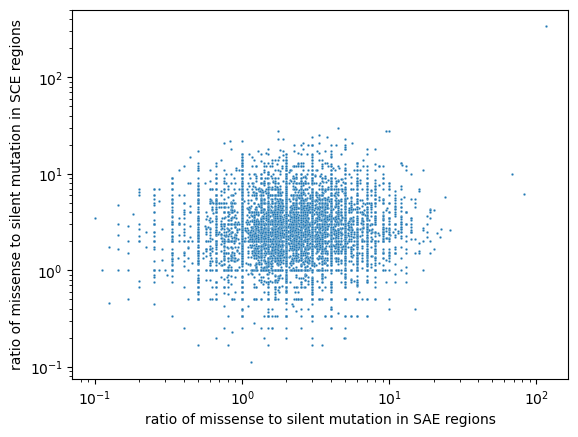

In [37]:
sns.scatterplot(x="SAE_ratios", y="SCE_ratios", data=ratios_w_mutation_counts, s=3)


#plt.xlim(0, 30)
#plt.ylim(0, 30)
plt.title("")
plt.xscale('log')
plt.yscale('log')
plt.xlabel('ratio of missense to silent mutation in SAE regions')
plt.ylabel('ratio of missense to silent mutation in SCE regions')


#plt.axline((0, 0), slope=1, color='gray', linestyle='--', label='y=x')

with chdir('..'):
    plt.savefig('figures/SAE_vs_SCE_mutation_ratio.png', bbox_inches='tight')

plt.show()


In [38]:
ratios_w_mutation_counts['log_SAE_ratios'] = np.log(ratios_w_mutation_counts['SAE_ratios'])
ratios_w_mutation_counts['log_SCE_ratios'] = np.log(ratios_w_mutation_counts['SCE_ratios'])

/opt/homebrew/Caskroom/miniconda/base/envs/BINF7700/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/BINF7700/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


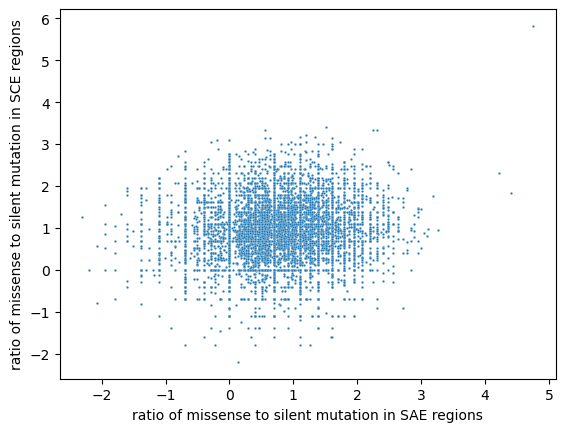

In [39]:
sns.scatterplot(x="log_SAE_ratios", y="log_SCE_ratios", data=ratios_w_mutation_counts, s=3)


#plt.xlim(0, 30)
#plt.ylim(0, 30)
plt.title("")

plt.xlabel('ratio of missense to silent mutation in SAE regions')
plt.ylabel('ratio of missense to silent mutation in SCE regions')


#plt.axline((0, 0), slope=1, color='gray', linestyle='--', label='y=x')

with chdir('..'):
    plt.savefig('figures/SAE_vs_SCE_mutation_ratio.png', bbox_inches='tight')

plt.show()

In [40]:
min(ratios_w_mutation_counts['log_SAE_ratios'])

-inf

Checking Total mutations in the 7966 genes above

In [41]:
genes = ratios['gene'].to_list()
total_mutations = sum_by_gene_filtered[sum_by_gene_filtered['gene'].isin(genes)]

total_mutations = total_mutations[['silent_count', 'missense_count']].sum()

total_mutations

silent_count       529126
missense_count    1331979
dtype: int64

# Checking for over or under representation of mutations in SAE and SCE regions

In [42]:
SAE = sum_by_gene[sum_by_gene['type'] == 'SAE']
SCE = sum_by_gene[sum_by_gene['type'] == 'SCE']
normal = sum_by_gene[sum_by_gene['type'] == 'normal']

genes_with_SAE = SAE['gene'].to_list()
genes_with_SCE = SCE['gene'].to_list()

In [44]:
results_df = pd.DataFrame({'gene': [], 'type': [], 'region_mutation_count': [], 'total_mutation_count': [], 'region_len': [], 'total_len': [], 'p_hypothesized': [], 'p_actual': [], 'pvalue': []})

for gene in genes_with_SAE:
    gene_df = sum_by_gene[sum_by_gene['gene'] == gene]

    SAE_count = gene_df[gene_df['type'] == 'SAE']['missense_count'].sum()
    normal_count = gene_df[gene_df['type'] == 'normal']['missense_count'].sum()
    total_count = SAE_count + normal_count

    SAE_len = gene_df[gene_df['type'] == 'SAE']['interval_len'].sum()
    normal_len = gene_df[gene_df['type'] == 'normal']['interval_len'].sum()
    total_len = SAE_len + normal_len

    p_hypothesized = SAE_len / total_len

    if total_count != 0:
        result = binomtest(SAE_count, total_count, p=p_hypothesized, alternative='two-sided')

        results_df.loc[results_df.shape[0]] = [gene, "SAE", int(SAE_count), int(total_count), int(SAE_len), int(total_len), float(p_hypothesized), float(result.statistic), float(result.pvalue)]

for gene in genes_with_SCE:
    gene_df = sum_by_gene[sum_by_gene['gene'] == gene]

    SCE_count = gene_df[gene_df['type'] == 'SCE']['missense_count'].sum()
    normal_count = gene_df[gene_df['type'] == 'normal']['missense_count'].sum()
    total_count = SCE_count + normal_count

    SCE_len = gene_df[gene_df['type'] == 'SCE']['interval_len'].sum()
    normal_len = gene_df[gene_df['type'] == 'normal']['interval_len'].sum()
    total_len = SCE_len + normal_len

    p_hypothesized = SCE_len / total_len

    if total_count != 0:
        result = binomtest(SCE_count, total_count, p=p_hypothesized, alternative='two-sided')

        results_df.loc[results_df.shape[0]] = [gene, "SCE", int(SCE_count), int(total_count), int(SCE_len), int(total_len), float(p_hypothesized), float(result.statistic), float(result.pvalue)]

results_df.head()

,gene,type,region_mutation_count,total_mutation_count,region_len,total_len,p_hypothesized,p_actual,pvalue
0,A1CF,SAE,25,181,161,1664,0.096755,0.138122,0.076528
1,A2M,SAE,2,337,26,4329,0.006006,0.005935,1.000000
2,A3GALT2,SAE,0,32,35,985,0.035533,0.000000,0.629583
3,A4GALT,SAE,4,68,47,1025,0.045854,0.058824,0.555184
4,A4GNT,SAE,0,88,26,934,0.027837,0.000000,0.182722


In [45]:
results_df.shape

(29569, 9)

In [46]:
results_df = results_df.sort_values(by=['pvalue'], ascending=[True]).reset_index(drop=True)
results_df['pvalue'] = results_df['pvalue'].replace(0, sys.float_info.min)

In [47]:
results_df

,gene,type,region_mutation_count,total_mutation_count,region_len,total_len,p_hypothesized,p_actual,pvalue
0,KRAS,SCE,1685,2008,105,10619,0.009888,0.839143,2.225074e-308
1,NRAS,SCE,409,948,73,13609,0.005364,0.431435,2.225074e-308
2,TP53,SAE,645,3887,90,8634,0.010424,0.165938,2.225074e-308
3,RBFOX1,SCE,100,175,798,952257,0.000838,0.571429,9.641836e-258
4,NRXN1,SAE,180,622,891,176407,0.005051,0.289389,4.985544e-254
...,...,...,...,...,...,...,...,...,...
29564,SNN,SCE,0,15,84,42792,0.001963,0.000000,1.000000e+00
29565,CIAO2B,SCE,0,13,37,784,0.047194,0.000000,1.000000e+00
29566,CIBAR1,SCE,1,35,94,1955,0.048082,0.028571,1.000000e+00
29567,CHAC2,SCE,1,29,25,550,0.045455,0.034483,1.000000e+00


In [48]:
from statsmodels.stats.multitest import multipletests
from statsmodels.stats.multitest import fdrcorrection

In [49]:
alpha = 0.05

rejectedBonf, p_adjBonf, _, alphacBonf = multipletests(results_df['pvalue'], alpha=alpha, method='bonferroni')
rejectedBH, p_adjBH = fdrcorrection(results_df['pvalue'])

In [50]:
results_df['rejectedBonf'] = rejectedBonf
results_df['p_adjBonf'] = p_adjBonf
results_df['alphacBonf'] = alphacBonf
results_df['rejectedBH'] = rejectedBH
results_df['p_adjBH'] = p_adjBH

In [51]:
results_df.head()

,gene,type,region_mutation_count,total_mutation_count,region_len,total_len,p_hypothesized,p_actual,pvalue,rejectedBonf,p_adjBonf,alphacBonf,rejectedBH,p_adjBH
0,KRAS,SCE,1685,2008,105,10619,0.009888,0.839143,2.225074e-308,True,6.579321e-304,0.000002,True,2.193107e-304
1,NRAS,SCE,409,948,73,13609,0.005364,0.431435,2.225074e-308,True,6.579321e-304,0.000002,True,2.193107e-304
2,TP53,SAE,645,3887,90,8634,0.010424,0.165938,2.225074e-308,True,6.579321e-304,0.000002,True,2.193107e-304
3,RBFOX1,SCE,100,175,798,952257,0.000838,0.571429,9.641836e-258,True,2.850994e-253,0.000002,True,7.127486e-254
4,NRXN1,SAE,180,622,891,176407,0.005051,0.289389,4.985544e-254,True,1.474176e-249,0.000002,True,2.948351e-250


In [52]:
results_df[results_df['rejectedBonf'] == True].shape

(1551, 14)

In [53]:
results_df[results_df['rejectedBH'] == True].shape

(3803, 14)

In [54]:
SAE_mutation_rate = results_df['region_mutation_count'] / results_df['region_len']
normal_mutation_rate = (results_df['total_mutation_count'] - results_df['region_mutation_count']) / (results_df['total_len'] - results_df['region_len'])

results_df['fold_change'] = SAE_mutation_rate / normal_mutation_rate

In [55]:
results_df.head()

,gene,type,region_mutation_count,total_mutation_count,region_len,total_len,p_hypothesized,p_actual,pvalue,rejectedBonf,p_adjBonf,alphacBonf,rejectedBH,p_adjBH,fold_change
0,KRAS,SCE,1685,2008,105,10619,0.009888,0.839143,2.225074e-308,True,6.579321e-304,0.000002,True,2.193107e-304,522.367389
1,NRAS,SCE,409,948,73,13609,0.005364,0.431435,2.225074e-308,True,6.579321e-304,0.000002,True,2.193107e-304,140.702569
2,TP53,SAE,645,3887,90,8634,0.010424,0.165938,2.225074e-308,True,6.579321e-304,0.000002,True,2.193107e-304,18.887107
3,RBFOX1,SCE,100,175,798,952257,0.000838,0.571429,9.641836e-258,True,2.850994e-253,0.000002,True,7.127486e-254,1589.739348
4,NRXN1,SAE,180,622,891,176407,0.005051,0.289389,4.985544e-254,True,1.474176e-249,0.000002,True,2.948351e-250,80.221217


In [56]:
results_df['log2_fold_change'] = np.log2(results_df['fold_change'])
results_df['-log_pvalue_Bonf'] = -np.log(results_df['p_adjBonf'])
results_df['-log_pvalue_BH'] = -np.log(results_df['p_adjBH'])

/opt/homebrew/Caskroom/miniconda/base/envs/BINF7700/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [57]:
results_df

,gene,type,region_mutation_count,total_mutation_count,region_len,total_len,p_hypothesized,p_actual,pvalue,rejectedBonf,p_adjBonf,alphacBonf,rejectedBH,p_adjBH,fold_change,log2_fold_change,-log_pvalue_Bonf,-log_pvalue_BH
0,KRAS,SCE,1685,2008,105,10619,0.009888,0.839143,2.225074e-308,True,6.579321e-304,0.000002,True,2.193107e-304,522.367389,9.028921,698.101937,699.200549
1,NRAS,SCE,409,948,73,13609,0.005364,0.431435,2.225074e-308,True,6.579321e-304,0.000002,True,2.193107e-304,140.702569,7.136505,698.101937,699.200549
2,TP53,SAE,645,3887,90,8634,0.010424,0.165938,2.225074e-308,True,6.579321e-304,0.000002,True,2.193107e-304,18.887107,4.239330,698.101937,699.200549
3,RBFOX1,SCE,100,175,798,952257,0.000838,0.571429,9.641836e-258,True,2.850994e-253,0.000002,True,7.127486e-254,1589.739348,10.634575,581.506361,582.892655
4,NRXN1,SAE,180,622,891,176407,0.005051,0.289389,4.985544e-254,True,1.474176e-249,0.000002,True,2.948351e-250,80.221217,6.325912,572.955589,574.565027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29564,SNN,SCE,0,15,84,42792,0.001963,0.000000,1.000000e+00,False,1.000000e+00,0.000002,False,1.000000e+00,0.000000,-inf,-0.000000,-0.000000
29565,CIAO2B,SCE,0,13,37,784,0.047194,0.000000,1.000000e+00,False,1.000000e+00,0.000002,False,1.000000e+00,0.000000,-inf,-0.000000,-0.000000
29566,CIBAR1,SCE,1,35,94,1955,0.048082,0.028571,1.000000e+00,False,1.000000e+00,0.000002,False,1.000000e+00,0.582290,-0.780189,-0.000000,-0.000000
29567,CHAC2,SCE,1,29,25,550,0.045455,0.034483,1.000000e+00,False,1.000000e+00,0.000002,False,1.000000e+00,0.750000,-0.415037,-0.000000,-0.000000


In [58]:
SAE_results_df = results_df[results_df['type'] == 'SAE'].reset_index()
SCE_results_df = results_df[results_df['type'] == 'SCE'].reset_index()

(0.001, 1.1)

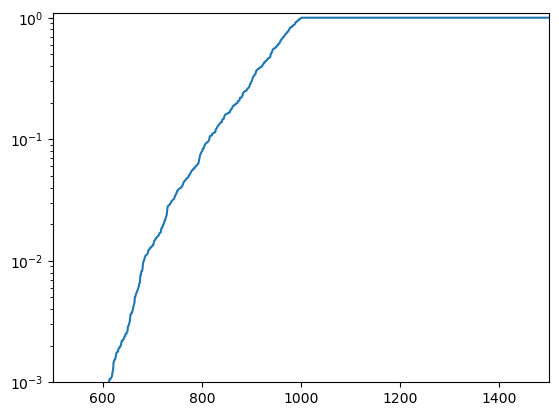

In [59]:
plt.plot(SAE_results_df.index, SAE_results_df['p_adjBonf'])
plt.yscale('log')
plt.xlim(500, 1500)
plt.ylim(0.001, 1.1)


In [60]:
SAE_results_df_rejected = SAE_results_df[SAE_results_df['rejectedBonf']]

SAE_results_df_rejected_higher = SAE_results_df_rejected[SAE_results_df_rejected['log2_fold_change'] > 0]
SAE_results_df_rejected_lower = SAE_results_df_rejected[SAE_results_df_rejected['log2_fold_change'] < 0]

print(f"Number of genes that reject the null hypothesis: {len(SAE_results_df_rejected)}")
print(f"Number of significant genes with higher mutation rates: {len(SAE_results_df_rejected_higher)}")
print(f"Number of significant genes with lower mutation rates: {len(SAE_results_df_rejected_lower)}")


Number of genes that reject the null hypothesis: 774
Number of significant genes with higher mutation rates: 771
Number of significant genes with lower mutation rates: 3


In [61]:
SCE_results_df_rejected = SCE_results_df[SCE_results_df['rejectedBonf']]

SCE_results_df_rejected_higher = SCE_results_df_rejected[SCE_results_df_rejected['log2_fold_change'] > 0]
SCE_results_df_rejected_lower = SCE_results_df_rejected[SCE_results_df_rejected['log2_fold_change'] < 0]

print(f"Number of genes that reject the null hypothesis: {len(SCE_results_df_rejected)}")
print(f"Number of significant genes with higher mutation rates: {len(SCE_results_df_rejected_higher)}")
print(f"Number of significant genes with lower mutation rates: {len(SCE_results_df_rejected_lower)}")

Number of genes that reject the null hypothesis: 777
Number of significant genes with higher mutation rates: 741
Number of significant genes with lower mutation rates: 36


In [62]:
SAE_results_df.shape

(13381, 19)

In [63]:
SCE_results_df.shape

(16188, 19)

In [64]:
SCE_results_df[SCE_results_df['log2_fold_change'] < 0].shape

(9219, 19)

In [65]:
SCE_results_df[SCE_results_df['log2_fold_change'] > 0].shape

(6965, 19)

0: Text(4.239329810150954, 698.1019367380483, 'TP53')
1: Text(6.325911942140782, 572.9555892175318, 'NRXN1')
2: Text(10.052987926824702, 469.53623883678637, 'TPTE')
3: Text(11.350855354383482, 359.93495245429403, 'RBFOX1')
4: Text(5.978707869579162, 287.37084096280915, 'NAV3')
5: Text(4.42, 283.49455353949446, 'KRAS')
6: Text(5.149448405782239, 260.53796006835626, 'TENM3')
7: Text(8.33, 248, 'NTM')
8: Text(9.177226792259026, 238.7277715268588, 'BRD1')
9: Text(3.877965948523194, 235.28353730752562, 'ANK3')
10: Text(6.809885224482025, 232.8506901731141, 'GRM3')
11: Text(8.4, 215, 'AQP7B')
12: Text(10.123848557372419, 222.10005816561542, 'TFAP2D')
13: Text(5.7833844267783325, 189.86695992237338, 'KCNH1')
14: Text(3.41, 189.79837018681474, 'KCNMA1')
15: Text(10.570071733269495, 186.15518225247243, 'IRX1')
16: Text(5.391171103612439, 165, 'GRIK2')
17: Text(3.95, 165.02081001617213, 'TRPS1')
18: Text(8.98807965579564, 158.2437295046237, 'PPARGC1A')
19: Text(6.90008321649316, 152.291186458136

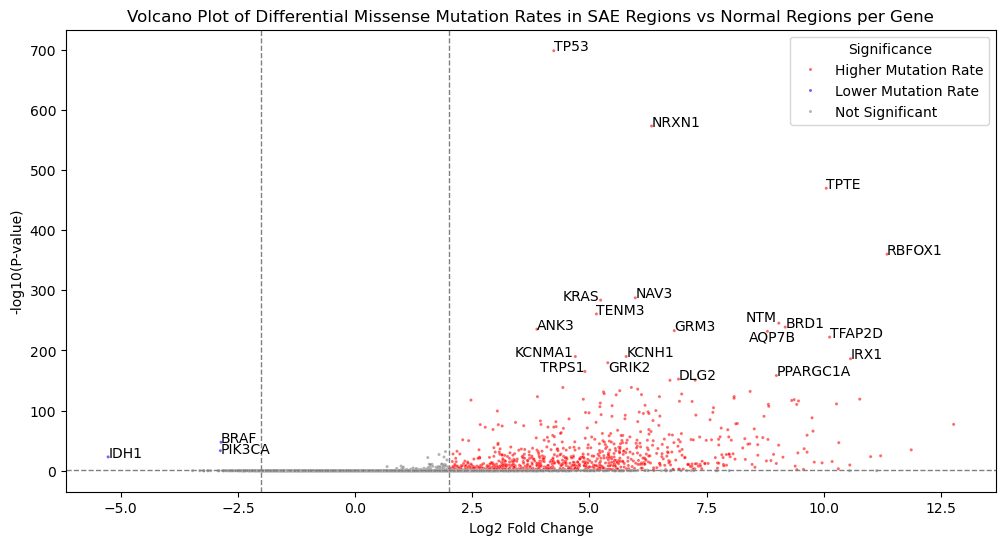

In [66]:
log2fc_threshold = 2.0
pvalue_threshold = 0.05
neg_log10_pvalue_threshold = -np.log10(pvalue_threshold)

log2FC_column = 'log2_fold_change'
neg_log10_pvalue_column = '-log_pvalue_Bonf'

# 4. Categorize genes for coloring
SAE_results_df['significance'] = 'Not Significant'
SAE_results_df.loc[(SAE_results_df[log2FC_column] > log2fc_threshold) & (SAE_results_df[neg_log10_pvalue_column] > neg_log10_pvalue_threshold), 'significance'] = 'Higher Mutation Rate'
SAE_results_df.loc[(SAE_results_df[log2FC_column] < -log2fc_threshold) & (SAE_results_df[neg_log10_pvalue_column] > neg_log10_pvalue_threshold), 'significance'] = 'Lower Mutation Rate'

# 5. Create the volcano plot
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=SAE_results_df,
    x=log2FC_column,
    y=neg_log10_pvalue_column,
    hue='significance',
    palette={'Higher Mutation Rate': 'red', 'Lower Mutation Rate': 'blue', 'Not Significant': 'grey'},
    alpha=0.6,
    s=5
)

# 6. Add significance lines
plt.axvline(x=log2fc_threshold, color='grey', linestyle='--', linewidth=1)
plt.axvline(x=-log2fc_threshold, color='grey', linestyle='--', linewidth=1)
plt.axhline(y=neg_log10_pvalue_threshold, color='grey', linestyle='--', linewidth=1)

# 7. Label selected genes
# You might want to label only the most significant or specific genes
genes_to_label = SAE_results_df[
    ((SAE_results_df[log2FC_column].abs() > log2fc_threshold) & (SAE_results_df[neg_log10_pvalue_column] > neg_log10_pvalue_threshold))
].sort_values(by=neg_log10_pvalue_column, ascending=False).head(20) # Example: top 20 significant genes

neg_genes_to_label = SAE_results_df[
    ((SAE_results_df[log2FC_column] < -log2fc_threshold) & (SAE_results_df[neg_log10_pvalue_column] > neg_log10_pvalue_threshold))
].sort_values(by=neg_log10_pvalue_column, ascending=False).head(3)

texts = []
for i, row in genes_to_label.iterrows():
    texts.append(plt.text(row[log2FC_column], row[neg_log10_pvalue_column], row['gene']))
for i, row in neg_genes_to_label.iterrows():
    texts.append(plt.text(row[log2FC_column], row[neg_log10_pvalue_column], row['gene']))

texts[5].set_x(4.42)
texts[7].set_y(248)
texts[7].set_x(8.33)
texts[11].set_y(215)
texts[11].set_x(8.4)
texts[14].set_x(3.41)
texts[16].set_y(165)
texts[17].set_x(3.95)
texts[21].set_y(29)

i=0
for text in texts:
    print(f"{i}: {text}")
    i+=1

# 8. Add labels and title
plt.xlabel("Log2 Fold Change")
plt.ylabel("-log10(P-value)")
plt.title("Volcano Plot of Differential Missense Mutation Rates in SAE Regions vs Normal Regions per Gene")
plt.legend(title="Significance")
#plt.grid(True, linestyle='--', alpha=0.7)

with chdir('..'):
    plt.savefig('figures/volcano_SAE_missense.png', bbox_inches='tight')

plt.show()

0: Text(9.028921023281049, 698.1019367380483, 'KRAS')
1: Text(7.136504864429176, 698.1019367380483, 'NRAS')
2: Text(10.634574527128596, 581.506360650301, 'RBFOX1')
3: Text(6.113819414620822, 449.82703933511505, 'MECOM')
4: Text(5.5027453129252715, 414.41760438314145, 'NRXN1')
5: Text(5.5340548228206865, 390.9789265767028, 'NAV3')
6: Text(8.392035115698459, 300.12491726806303, 'AQP7B')
7: Text(5.411204112441169, 272.7539687919508, 'KIAA1217')
8: Text(5.015698879246772, 253.1738273859513, 'GRM7')
9: Text(4.773514867915742, 233, 'TRPS1')
10: Text(3.58, 245, 'TENM3')
11: Text(7.856675182304327, 245.45350944013444, 'TPTE')
12: Text(2.71, 237.31187107785647, 'ANK3')
13: Text(6.133865677251393, 232.94126764868693, 'PAX5')
14: Text(8.804869185826554, 227, 'CDH4')
15: Text(8.332366842542339, 208, 'PPARGC1A')
16: Text(4.958606474526765, 210.60270797603008, 'PPP2R1A')
17: Text(4.03, 205.97820157579795, 'GRIK2')
18: Text(10.372489130328521, 193.34010467766066, 'FOXD4L5')
19: Text(5.95942336016852,

/opt/homebrew/Caskroom/miniconda/base/envs/BINF7700/lib/python3.12/site-packages/matplotlib/transforms.py:352: RuntimeWarning: invalid value encountered in scalar subtract
  return points[1, 0] - points[0, 0]


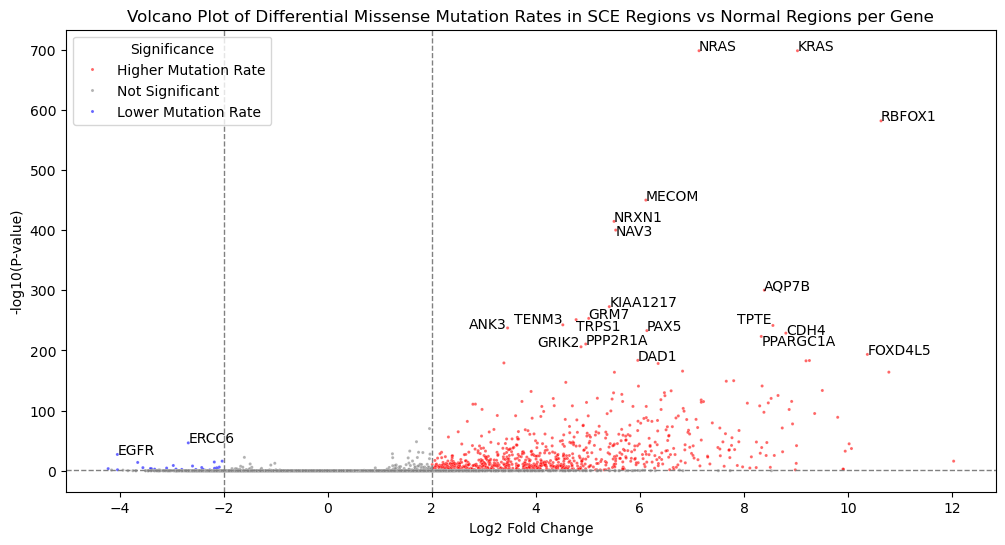

In [67]:
log2fc_threshold = 2.0
pvalue_threshold = 0.05
neg_log10_pvalue_threshold = -np.log10(pvalue_threshold)

log2FC_column = 'log2_fold_change'
neg_log10_pvalue_column = '-log_pvalue_Bonf'

# 4. Categorize genes for coloring
SCE_results_df['significance'] = 'Not Significant'
SCE_results_df.loc[(SCE_results_df[log2FC_column] > log2fc_threshold) & (SCE_results_df[neg_log10_pvalue_column] > neg_log10_pvalue_threshold), 'significance'] = 'Higher Mutation Rate'
SCE_results_df.loc[(SCE_results_df[log2FC_column] < -log2fc_threshold) & (SCE_results_df[neg_log10_pvalue_column] > neg_log10_pvalue_threshold), 'significance'] = 'Lower Mutation Rate'

# 5. Create the volcano plot
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=SCE_results_df,
    x=log2FC_column,
    y=neg_log10_pvalue_column,
    hue='significance',
    palette={'Higher Mutation Rate': 'red', 'Lower Mutation Rate': 'blue', 'Not Significant': 'grey'},
    alpha=0.6,
    s=5
)

# 6. Add significance lines
plt.axvline(x=log2fc_threshold, color='grey', linestyle='--', linewidth=1)
plt.axvline(x=-log2fc_threshold, color='grey', linestyle='--', linewidth=1)
plt.axhline(y=neg_log10_pvalue_threshold, color='grey', linestyle='--', linewidth=1)

# 7. Label selected genes
# You might want to label only the most significant or specific genes
genes_to_label = SCE_results_df[
    ((SCE_results_df[log2FC_column].abs() > log2fc_threshold) & (SCE_results_df[neg_log10_pvalue_column] > neg_log10_pvalue_threshold))
].sort_values(by=neg_log10_pvalue_column, ascending=False).head(20) # Example: top 20 significant genes

neg_genes_to_label = SCE_results_df[
    ((SCE_results_df[log2FC_column] < -log2fc_threshold) & (SCE_results_df[neg_log10_pvalue_column] > neg_log10_pvalue_threshold))
].sort_values(by=neg_log10_pvalue_column, ascending=False).head(3)

texts = []
for i, row in genes_to_label.iterrows():
    texts.append(plt.text(row[log2FC_column], row[neg_log10_pvalue_column], row['gene']))
for i, row in neg_genes_to_label.iterrows():
    texts.append(plt.text(row[log2FC_column], row[neg_log10_pvalue_column], row['gene']))

texts[12].set_x(2.71)
texts[17].set_x(4.03)
texts[10].set_x(3.58)
texts[10].set_y(245)
texts[9].set_y(233)
texts[15].set_y(208)
texts[14].set_y(227)
texts[11].set_y(245.45350944013444)
texts[11].set_x(7.856675182304327)
texts[5].set_y(390.9789265767028)

i=0
for text in texts:
    print(f"{i}: {text}")
    i+=1

# 8. Add labels and title
plt.xlabel("Log2 Fold Change")
plt.ylabel("-log10(P-value)")
plt.title("Volcano Plot of Differential Missense Mutation Rates in SCE Regions vs Normal Regions per Gene")
plt.legend(title="Significance")
#plt.grid(True, linestyle='--', alpha=0.7)

with chdir('..'):
    plt.savefig('figures/volcano_SCE_missense.png', bbox_inches='tight')

plt.show()

# Over-representation Analysis (ORA)

In [68]:
SAE_results_df_sorted = SAE_results_df.sort_values(by='-log_pvalue_Bonf', ascending=False)

SAE_significant_genes = SAE_results_df_sorted[SAE_results_df_sorted['rejectedBonf']]['gene']

In [69]:
SAE_enriched_significant = gp.enrichr(gene_list=SAE_significant_genes, 
                            gene_sets=['GO_Biological_Process_2021'], 
                            organism='human', 
                            outdir=None,
                            )

In [70]:
SAE_enriched_significant.results['Term']

0       modulation of chemical synaptic transmission (...
1       negative regulation of transcription, DNA-temp...
2       anterograde trans-synaptic signaling (GO:0098916)
3             chemical synaptic transmission (GO:0007268)
4       regulation of transcription, DNA-templated (GO...
                              ...                        
3339               mitochondrial translation (GO:0032543)
3340            peptide biosynthetic process (GO:0043043)
3341    sulfur compound biosynthetic process (GO:0044272)
3342                             translation (GO:0006412)
3343           defense response to bacterium (GO:0042742)
Name: Term, Length: 3344, dtype: object

/opt/homebrew/Caskroom/miniconda/base/envs/BINF7700/lib/python3.12/site-packages/gseapy/plot.py:756: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda _x: _x.sort_values(by=self.colname).tail(self.n_terms))


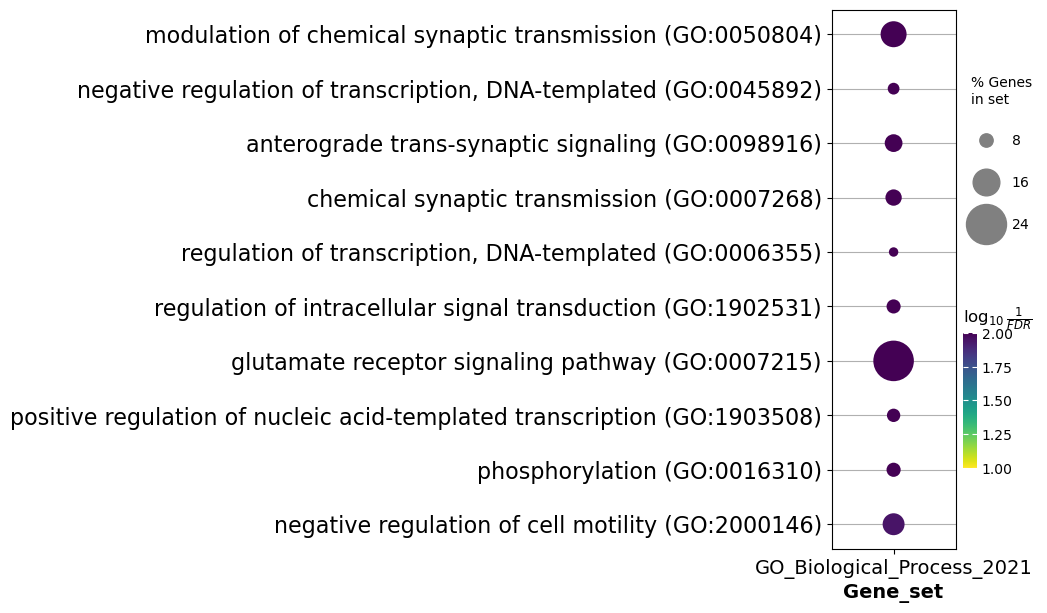

In [71]:
ax = gp.dotplot(SAE_enriched_significant.results,
              column="Adjusted P-value",
              x='Gene_set', # set x axis, so you could do a multi-sample/library comparsion
              size=20,
              top_term=10,
              figsize=(2,7),
              marker='o',
             )

with chdir('..'):
    plt.savefig('figures/ORA_missense_SAE.png', bbox_inches='tight')

plt.show()

In [72]:
SAE_enriched_significant_KEGG = gp.enrichr(gene_list=SAE_significant_genes, 
                            gene_sets='KEGG_2021_Human', 
                            organism='human', 
                            outdir=None,
                            )

/opt/homebrew/Caskroom/miniconda/base/envs/BINF7700/lib/python3.12/site-packages/gseapy/plot.py:756: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda _x: _x.sort_values(by=self.colname).tail(self.n_terms))


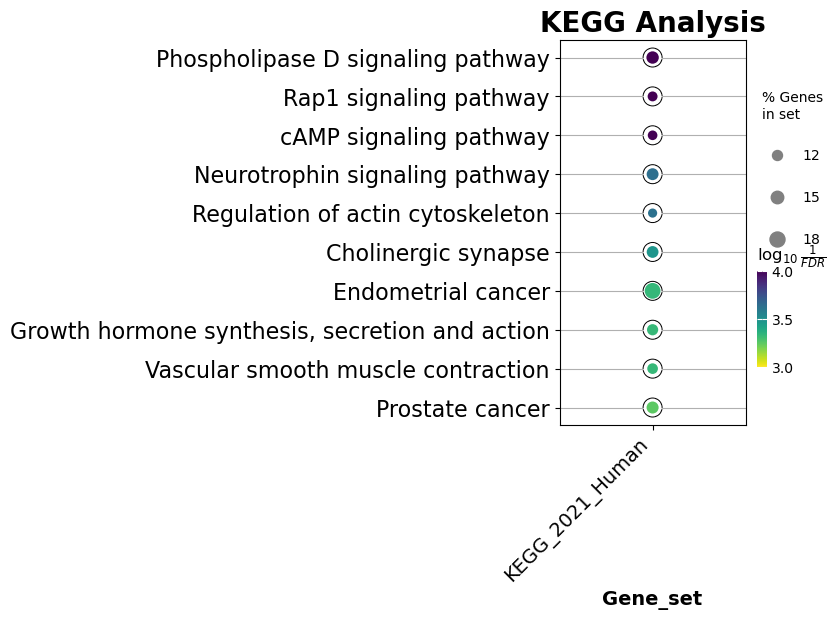

In [73]:
ax = gp.dotplot(SAE_enriched_significant_KEGG.results,
              column="Adjusted P-value",
              x='Gene_set', # set x axis, so you could do a multi-sample/library comparsion
              size=10,
              top_term=10,
              figsize=(3,5),
              title = "KEGG Analysis",
              xticklabels_rot=45, # rotate xtick labels
              show_ring=True, # set to False to revmove outer ring
              marker='o',
             )

In [74]:
SAE_mut_counts_per_sig_gene = pd.merge(sum_by_gene2, SAE_significant_genes, how='inner')

print(len(SAE_mut_counts_per_sig_gene[SAE_mut_counts_per_sig_gene['total_count']>=162]))
print(len(SAE_mut_counts_per_sig_gene[SAE_mut_counts_per_sig_gene['total_count']<162]))

438
336


In [75]:
SCE_results_df_sorted = SCE_results_df.sort_values(by='-log_pvalue_Bonf', ascending=False)

SCE_significant_genes = SCE_results_df_sorted[SCE_results_df_sorted['rejectedBonf']]['gene']

In [76]:
SCE_enriched_significant = gp.enrichr(gene_list=SCE_significant_genes, 
                            gene_sets=['GO_Biological_Process_2021'], 
                            organism='human', 
                            outdir=None,
                            )

/opt/homebrew/Caskroom/miniconda/base/envs/BINF7700/lib/python3.12/site-packages/gseapy/plot.py:756: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda _x: _x.sort_values(by=self.colname).tail(self.n_terms))


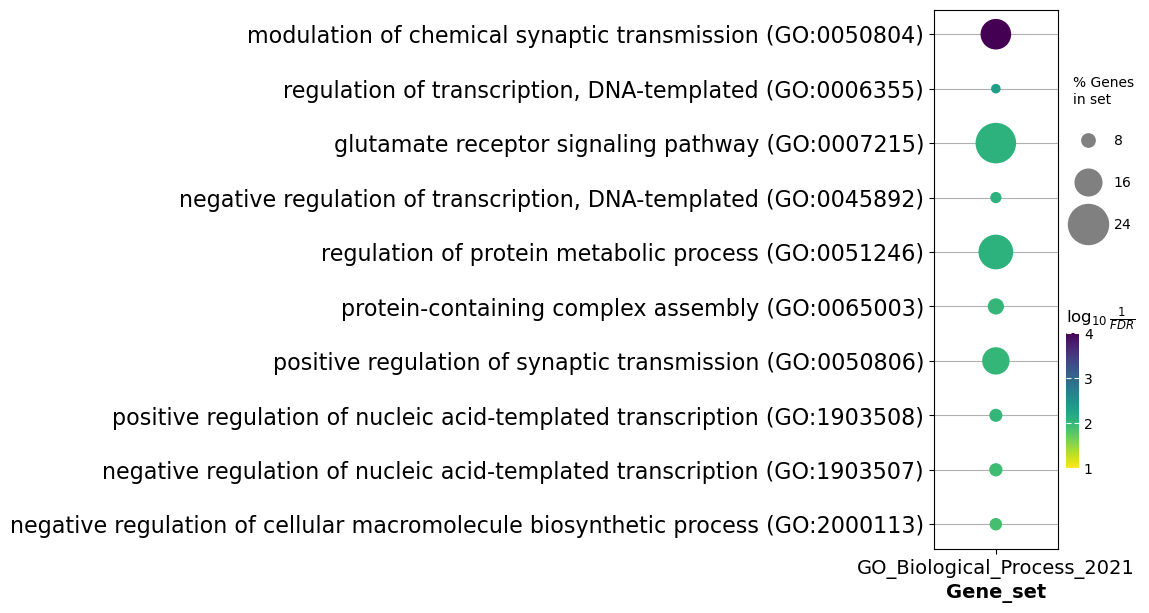

In [77]:
ax = gp.dotplot(SCE_enriched_significant.results,
              column="Adjusted P-value",
              x='Gene_set', # set x axis, so you could do a multi-sample/library comparsion
              size=20,
              top_term=10,
              figsize=(2,7),
              marker='o',
             )

with chdir('..'):
    plt.savefig('figures/ORA_missense_SCE.png', bbox_inches='tight')

plt.show()

In [78]:
common_genes = pd.merge(SAE_significant_genes, SCE_significant_genes, how='inner')

In [79]:
len(common_genes)

463

All mutations

In [80]:
total_results_df = pd.DataFrame({'gene': [], 'type': [], 'region_mutation_count': [], 'total_mutation_count': [], 'region_len': [], 'total_len': [], 'p_hypothesized': [], 'p_actual': [], 'pvalue': []})

for gene in genes_with_SAE:
    gene_df = sum_by_gene[sum_by_gene['gene'] == gene]

    SAE_count = gene_df[gene_df['type'] == 'SAE']['total_count'].sum()
    normal_count = gene_df[gene_df['type'] == 'normal']['total_count'].sum()
    total_count = SAE_count + normal_count

    SAE_len = gene_df[gene_df['type'] == 'SAE']['interval_len'].sum()
    normal_len = gene_df[gene_df['type'] == 'normal']['interval_len'].sum()
    total_len = SAE_len + normal_len

    p_hypothesized = SAE_len / total_len

    if total_count != 0:
        result = binomtest(SAE_count, total_count, p=p_hypothesized, alternative='two-sided')

        total_results_df.loc[total_results_df.shape[0]] = [gene, "SAE", int(SAE_count), int(total_count), int(SAE_len), int(total_len), float(p_hypothesized), float(result.statistic), float(result.pvalue)]

for gene in genes_with_SCE:
    gene_df = sum_by_gene[sum_by_gene['gene'] == gene]

    SCE_count = gene_df[gene_df['type'] == 'SCE']['total_count'].sum()
    normal_count = gene_df[gene_df['type'] == 'normal']['total_count'].sum()
    total_count = SCE_count + normal_count

    SCE_len = gene_df[gene_df['type'] == 'SCE']['interval_len'].sum()
    normal_len = gene_df[gene_df['type'] == 'normal']['interval_len'].sum()
    total_len = SCE_len + normal_len

    p_hypothesized = SCE_len / total_len

    if total_count != 0:
        result = binomtest(SCE_count, total_count, p=p_hypothesized, alternative='two-sided')

        total_results_df.loc[total_results_df.shape[0]] = [gene, "SCE", int(SCE_count), int(total_count), int(SCE_len), int(total_len), float(p_hypothesized), float(result.statistic), float(result.pvalue)]

total_results_df.head()

,gene,type,region_mutation_count,total_mutation_count,region_len,total_len,p_hypothesized,p_actual,pvalue
0,A1CF,SAE,33,253,161,1664,0.096755,0.130435,0.087506
1,A2M,SAE,2,481,26,4329,0.006006,0.004158,1.000000
2,A3GALT2,SAE,0,60,35,985,0.035533,0.000000,0.278473
3,A4GALT,SAE,14,122,47,1025,0.045854,0.114754,0.001468
4,A4GNT,SAE,0,121,26,934,0.027837,0.000000,0.085864


In [81]:
total_results_df = total_results_df.sort_values(by=['pvalue'], ascending=[True]).reset_index(drop=True)
total_results_df['pvalue'] = total_results_df['pvalue'].replace(0, sys.float_info.min)

In [82]:
alpha = 0.05

rejectedBonf, p_adjBonf, _, alphacBonf = multipletests(total_results_df['pvalue'], alpha=alpha, method='bonferroni')
rejectedBH, p_adjBH = fdrcorrection(total_results_df['pvalue'])

In [83]:
total_results_df['rejectedBonf'] = rejectedBonf
total_results_df['p_adjBonf'] = p_adjBonf
total_results_df['alphacBonf'] = alphacBonf
total_results_df['rejectedBH'] = rejectedBH
total_results_df['p_adjBH'] = p_adjBH

In [84]:
SAE_mutation_rate = total_results_df['region_mutation_count'] / total_results_df['region_len']
normal_mutation_rate = (total_results_df['total_mutation_count'] - total_results_df['region_mutation_count']) / (total_results_df['total_len'] - total_results_df['region_len'])

total_results_df['fold_change'] = SAE_mutation_rate / normal_mutation_rate

In [85]:
total_results_df['log2_fold_change'] = np.log2(total_results_df['fold_change'])
total_results_df['-log_pvalue_Bonf'] = -np.log(total_results_df['p_adjBonf'])
total_results_df['-log_pvalue_BH'] = -np.log(total_results_df['p_adjBH'])

/opt/homebrew/Caskroom/miniconda/base/envs/BINF7700/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [86]:
SAE_total_results_df = total_results_df[total_results_df['type'] == 'SAE'].reset_index()
SCE_total_results_df = total_results_df[total_results_df['type'] == 'SCE'].reset_index()

In [87]:
SAE_total_results_df_rejected = SAE_total_results_df[SAE_total_results_df['rejectedBonf']]

SAE_total_results_df_rejected_higher = SAE_total_results_df_rejected[SAE_total_results_df_rejected['log2_fold_change'] > 0]
SAE_total_results_df_rejected_lower = SAE_total_results_df_rejected[SAE_total_results_df_rejected['log2_fold_change'] < 0]

print(f"Number of genes that reject the null hypothesis: {len(SAE_total_results_df_rejected)}")
print(f"Number of significant genes with higher mutation rates: {len(SAE_total_results_df_rejected_higher)}")
print(f"Number of significant genes with lower mutation rates: {len(SAE_total_results_df_rejected_lower)}")

Number of genes that reject the null hypothesis: 1031
Number of significant genes with higher mutation rates: 1028
Number of significant genes with lower mutation rates: 3


In [88]:
SCE_total_results_df_rejected = SCE_total_results_df[SCE_total_results_df['rejectedBonf']]

SCE_total_results_df_rejected_higher = SCE_total_results_df_rejected[SCE_total_results_df_rejected['log2_fold_change'] > 0]
SCE_total_results_df_rejected_lower = SCE_total_results_df_rejected[SCE_total_results_df_rejected['log2_fold_change'] < 0]

print(f"Number of genes that reject the null hypothesis: {len(SCE_total_results_df_rejected)}")
print(f"Number of significant genes with higher mutation rates: {len(SCE_total_results_df_rejected_higher)}")
print(f"Number of significant genes with lower mutation rates: {len(SCE_total_results_df_rejected_lower)}")

Number of genes that reject the null hypothesis: 941
Number of significant genes with higher mutation rates: 861
Number of significant genes with lower mutation rates: 80


In [89]:
total_results_df.head()

,gene,type,region_mutation_count,total_mutation_count,region_len,total_len,p_hypothesized,p_actual,pvalue,rejectedBonf,p_adjBonf,alphacBonf,rejectedBH,p_adjBH,fold_change,log2_fold_change,-log_pvalue_Bonf,-log_pvalue_BH
0,NRAS,SCE,412,958,73,13609,0.005364,0.430063,2.225074e-308,True,6.583104e-304,0.000002,True,1.316621e-304,139.917507,7.128433,698.101362,699.7108
1,NRXN1,SAE,266,865,891,176407,0.005051,0.307514,2.225074e-308,True,6.583104e-304,0.000002,True,1.316621e-304,87.476988,6.450832,698.101362,699.7108
2,TP53,SAE,649,3936,90,8634,0.010424,0.164888,2.225074e-308,True,6.583104e-304,0.000002,True,1.316621e-304,18.744062,4.228362,698.101362,699.7108
3,RBFOX1,SCE,141,243,798,952257,0.000838,0.580247,2.225074e-308,True,6.583104e-304,0.000002,True,1.316621e-304,1648.185648,10.686663,698.101362,699.7108
4,KRAS,SCE,1690,2029,105,10619,0.009888,0.832923,2.225074e-308,True,6.583104e-304,0.000002,True,1.316621e-304,499.189774,8.963445,698.101362,699.7108


0: Text(6.450831647914942, 698.101361976812, 'NRXN1')
1: Text(4.228361762276707, 698.101361976812, 'TP53')
2: Text(11.669749389181211, 631.398610932608, 'RBFOX1')
3: Text(9.984890717528328, 559.5890046364843, 'TPTE')
4: Text(6.047364230246104, 395.46170269315274, 'NAV3')
5: Text(5.142238338064421, 356.005684283549, 'TENM3')
6: Text(9.1035009061711, 343.99612627930156, 'NTM')
7: Text(6.779511575438506, 333.1497819410919, 'GRM3')
8: Text(9.124063647883313, 310.2334269387164, 'BRD1')
9: Text(7.78, 303.89395028291204, 'AQP7B')
10: Text(3.8274127860960423, 297.2244623781825, 'ANK3')
11: Text(10.519199403470946, 291.1220976602983, 'IRX1')
12: Text(5.181391086244211, 282.14730394182646, 'KRAS')
13: Text(3.54, 275.95781344814753, 'KCNMA1')
14: Text(9.846086015403383, 261.2797997433737, 'TFAP2D')
15: Text(4.8, 255, 'TRPS1')
16: Text(7.491721562580728, 238.43072028113474, 'AFDN')
17: Text(5.64566555933953, 237.9318980660044, 'KCNH1')
18: Text(3.88, 232.4390515241918, 'TP63')
19: Text(9.040048524

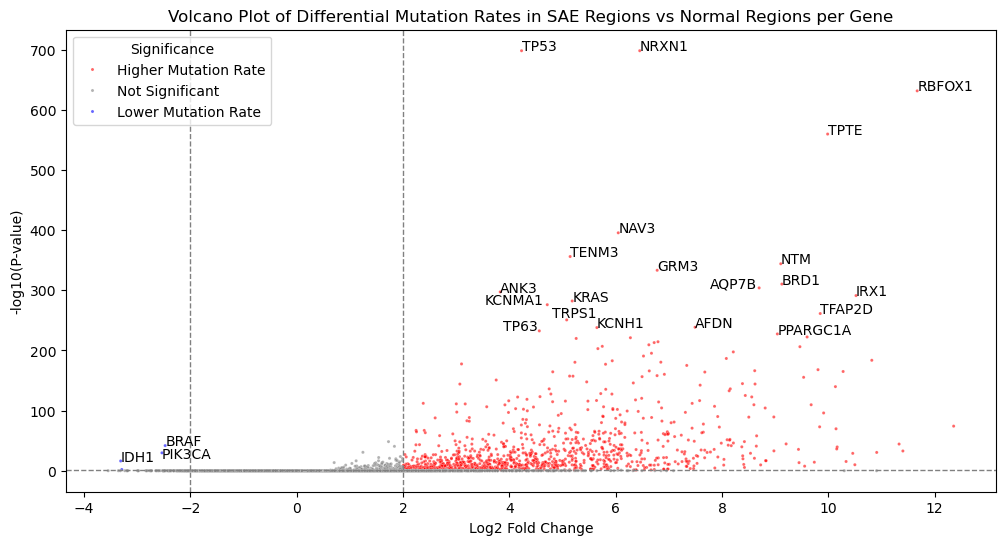

In [90]:
log2fc_threshold = 2.0
pvalue_threshold = 0.05
neg_log10_pvalue_threshold = -np.log10(pvalue_threshold)

log2FC_column = 'log2_fold_change'
neg_log10_pvalue_column = '-log_pvalue_Bonf'

# 4. Categorize genes for coloring
SAE_total_results_df['significance'] = 'Not Significant'
SAE_total_results_df.loc[(SAE_total_results_df[log2FC_column] > log2fc_threshold) & (SAE_total_results_df[neg_log10_pvalue_column] > neg_log10_pvalue_threshold), 'significance'] = 'Higher Mutation Rate'
SAE_total_results_df.loc[(SAE_total_results_df[log2FC_column] < -log2fc_threshold) & (SAE_total_results_df[neg_log10_pvalue_column] > neg_log10_pvalue_threshold), 'significance'] = 'Lower Mutation Rate'

# 5. Create the volcano plot
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=SAE_total_results_df,
    x=log2FC_column,
    y=neg_log10_pvalue_column,
    hue='significance',
    palette={'Higher Mutation Rate': 'red', 'Lower Mutation Rate': 'blue', 'Not Significant': 'grey'},
    alpha=0.6,
    s=5
)

# 6. Add significance lines
plt.axvline(x=log2fc_threshold, color='grey', linestyle='--', linewidth=1)
plt.axvline(x=-log2fc_threshold, color='grey', linestyle='--', linewidth=1)
plt.axhline(y=neg_log10_pvalue_threshold, color='grey', linestyle='--', linewidth=1)

# 7. Label selected genes
# You might want to label only the most significant or specific genes
genes_to_label = SAE_total_results_df[
    ((SAE_total_results_df[log2FC_column].abs() > log2fc_threshold) & (SAE_total_results_df[neg_log10_pvalue_column] > neg_log10_pvalue_threshold))
].sort_values(by=neg_log10_pvalue_column, ascending=False).head(20) # Example: top 20 significant genes

neg_genes_to_label = SAE_total_results_df[
    ((SAE_total_results_df[log2FC_column] < -log2fc_threshold) & (SAE_total_results_df[neg_log10_pvalue_column] > neg_log10_pvalue_threshold))
].sort_values(by=neg_log10_pvalue_column, ascending=False).head(3)

texts = []
for i, row in genes_to_label.iterrows():
    texts.append(plt.text(row[log2FC_column], row[neg_log10_pvalue_column], row['gene']))
for i, row in neg_genes_to_label.iterrows():
    texts.append(plt.text(row[log2FC_column], row[neg_log10_pvalue_column], row['gene']))

texts[13].set_x(3.54)
texts[15].set_x(4.8)
texts[15].set_y(255)
texts[18].set_x(3.88)
texts[9].set_x(7.78)
texts[21].set_y(20)

i=0
for text in texts:
    print(f"{i}: {text}")
    i+=1

# 8. Add labels and title
plt.xlabel("Log2 Fold Change")
plt.ylabel("-log10(P-value)")
plt.title("Volcano Plot of Differential Mutation Rates in SAE Regions vs Normal Regions per Gene")
plt.legend(title="Significance")
#plt.grid(True, linestyle='--', alpha=0.7)

with chdir('..'):
    plt.savefig('figures/volcano_SAE_total.png', bbox_inches='tight')

plt.show()

0: Text(7.128432680503298, 698.101361976812, 'NRAS')
1: Text(10.68666303827705, 698.101361976812, 'RBFOX1')
2: Text(8.963444569938956, 698.101361976812, 'KRAS')
3: Text(5.602504944801033, 618.2735479591721, 'NRXN1')
4: Text(5.9469717976165235, 533.2532245329016, 'MECOM')
5: Text(5.399159201684311, 454.90968246190357, 'NAV3')
6: Text(8.415321396340802, 436.26615479027026, 'AQP7B')
7: Text(3.84, 420.6511280466644, 'TENM3')
8: Text(5.494083823461568, 412.57500642932206, 'KIAA1217')
9: Text(5.028177818528463, 381.2069358005284, 'GRM7')
10: Text(8.765543157362904, 363.9846742870478, 'TPTE')
11: Text(4.8497144937971415, 345.62943503038576, 'TRPS1')
12: Text(7.096218354825115, 309.3398498028583, 'PAPPA')
13: Text(3.429334892376484, 307.0111123211899, 'ANK3')
14: Text(8.35, 305, 'CDH4')
15: Text(7.5, 278, 'PPARGC1A')
16: Text(9.348830338791698, 292.50935620290124, 'TFAP2D')
17: Text(5.93747365338675, 270, 'DAD1')
18: Text(6.06094585971165, 250, 'PAX5')
19: Text(4.743821142328149, 253.852805820

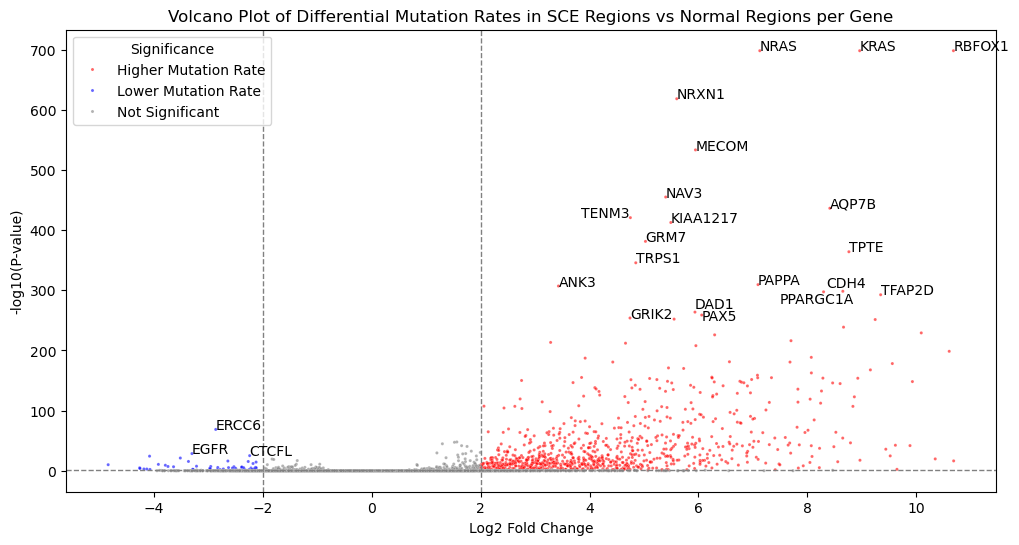

In [91]:
log2fc_threshold = 2.0
pvalue_threshold = 0.05
neg_log10_pvalue_threshold = -np.log10(pvalue_threshold)

log2FC_column = 'log2_fold_change'
neg_log10_pvalue_column = '-log_pvalue_Bonf'

# 4. Categorize genes for coloring
SCE_total_results_df['significance'] = 'Not Significant'
SCE_total_results_df.loc[(SCE_total_results_df[log2FC_column] > log2fc_threshold) & (SCE_total_results_df[neg_log10_pvalue_column] > neg_log10_pvalue_threshold), 'significance'] = 'Higher Mutation Rate'
SCE_total_results_df.loc[(SCE_total_results_df[log2FC_column] < -log2fc_threshold) & (SCE_total_results_df[neg_log10_pvalue_column] > neg_log10_pvalue_threshold), 'significance'] = 'Lower Mutation Rate'

# 5. Create the volcano plot
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=SCE_total_results_df,
    x=log2FC_column,
    y=neg_log10_pvalue_column,
    hue='significance',
    palette={'Higher Mutation Rate': 'red', 'Lower Mutation Rate': 'blue', 'Not Significant': 'grey'},
    alpha=0.6,
    s=5
)

# 6. Add significance lines
plt.axvline(x=log2fc_threshold, color='grey', linestyle='--', linewidth=1)
plt.axvline(x=-log2fc_threshold, color='grey', linestyle='--', linewidth=1)
plt.axhline(y=neg_log10_pvalue_threshold, color='grey', linestyle='--', linewidth=1)

# 7. Label selected genes
# You might want to label only the most significant or specific genes
genes_to_label = SCE_total_results_df[
    ((SCE_total_results_df[log2FC_column].abs() > log2fc_threshold) & (SCE_total_results_df[neg_log10_pvalue_column] > neg_log10_pvalue_threshold))
].sort_values(by=neg_log10_pvalue_column, ascending=False).head(20) # Example: top 20 significant genes

neg_genes_to_label = SCE_total_results_df[
    ((SCE_total_results_df[log2FC_column] < -log2fc_threshold) & (SCE_total_results_df[neg_log10_pvalue_column] > neg_log10_pvalue_threshold))
].sort_values(by=neg_log10_pvalue_column, ascending=False).head(3)

texts = []
for i, row in genes_to_label.iterrows():
    texts.append(plt.text(row[log2FC_column], row[neg_log10_pvalue_column], row['gene']))
for i, row in neg_genes_to_label.iterrows():
    texts.append(plt.text(row[log2FC_column], row[neg_log10_pvalue_column], row['gene']))

texts[17].set_y(270)
texts[18].set_y(250)
texts[7].set_x(3.84)
texts[15].set_x(7.5)
texts[15].set_y(278)
texts[14].set_y(305)
texts[14].set_x(8.35)

i=0
for text in texts:
    print(f"{i}: {text}")
    i+=1

# 8. Add labels and title
plt.xlabel("Log2 Fold Change")
plt.ylabel("-log10(P-value)")
plt.title("Volcano Plot of Differential Mutation Rates in SCE Regions vs Normal Regions per Gene")
plt.legend(title="Significance")
#plt.grid(True, linestyle='--', alpha=0.7)

with chdir('..'):
    plt.savefig('figures/volcano_SCE_total.png', bbox_inches='tight')

plt.show()

In [92]:
SAE_total_results_df_sorted = SAE_total_results_df.sort_values(by='-log_pvalue_Bonf', ascending=False)

SAE_total_significant_genes = SAE_total_results_df_sorted[SAE_total_results_df_sorted['rejectedBonf']]['gene']

In [93]:
SCE_total_results_df_sorted = SCE_total_results_df.sort_values(by='-log_pvalue_Bonf', ascending=False)

SCE_total_significant_genes = SCE_total_results_df_sorted[SCE_total_results_df_sorted['rejectedBonf']]['gene']

In [ ]:
total_common_genes = pd.merge(SAE_total_significant_genes, SCE_total_significant_genes, how='inner')
SAE_common_genes = pd.merge(SAE_significant_genes, SAE_total_significant_genes, how='inner')
SCE_common_genes = pd.merge(SCE_significant_genes, SCE_total_significant_genes, how='inner')

In [95]:
print(len(total_common_genes))

585


In [96]:
print(len(SAE_common_genes))

750


In [97]:
print(len(SCE_common_genes))

757


In [98]:
total_common_genes.head()

,gene
0,NRXN1
1,TP53
2,RBFOX1
3,TPTE
4,NAV3


In [104]:
SAE_significant_genes = pd.merge(SAE_significant_genes, SAE_significant_genes, how='inner')
SCE_significant_genes = pd.merge(SCE_significant_genes, SCE_significant_genes, how='inner')
SAE_total_significant_genes = pd.merge(SAE_total_significant_genes, SAE_total_significant_genes, how='inner')
SCE_total_significant_genes = pd.merge(SCE_total_significant_genes, SCE_total_significant_genes, how='inner')

In [129]:
gene = "VHL"
print(SAE_significant_genes[SAE_significant_genes['gene'] == gene])
print(SCE_significant_genes[SCE_significant_genes['gene'] == gene])
print(SAE_total_significant_genes[SAE_total_significant_genes['gene'] == gene])
print(SCE_total_significant_genes[SCE_total_significant_genes['gene'] == gene])


Empty DataFrame
Columns: [gene]
Index: []
    gene
352  VHL
Empty DataFrame
Columns: [gene]
Index: []
    gene
482  VHL
